In [80]:
import re
import pandas as pd

In [81]:
f=open("WhatsApp Chat with CSE IV A UNOFFICIAL.txt","r",encoding='utf-8')

In [82]:
data =f.read()
print(data)

23/08/22, 19:29 - ~‚ÄØPrakhar created group "CSE III A UNOFFICIAL"
23/08/22, 19:29 - You were added
25/10/22, 11:54 - Sumit Pathak: Yaar discrete me bhi assignment mila hai kya
25/10/22, 11:55 - Sumit Pathak: Mila hai toh please solution bhi bhej do please
25/10/22, 14:19 - +91 93356 54042: Kya yrr Diwali to thik sae mana lo
25/10/22, 14:20 - +91 72680 42840: üòÇ
25/10/22, 14:20 - Niet Tanay: Aaj ke din padhai nahi ki jaati hai
25/10/22, 14:36 - +91 80776 01410: Kya sumit sara mood kharab kr diyaü§¢
25/10/22, 15:55 - Suryansh_sgh25: Ye baat toh bhut acchi khi aap ne üòÇüòÇ
25/10/22, 17:18 - +91 788 038 5227: <Media omitted>
25/10/22, 17:18 - Sumit Pathak: Meine bhi dekha
25/10/22, 17:43 - +91 80776 01410: This message was deleted
28/10/22, 12:11 - +91 788 038 5227: Koi college gya h kya aaj
28/10/22, 12:21 - Sumit Pathak: Mere janne walo me se toh koi nhi gya
31/10/22, 21:38 - +91 788 038 5227: Koi discrete ka assignment kiya h
31/10/22, 21:38 - +91 788 038 5227: Bhej do
01/11/22, 

In [83]:
pattern="\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s"
message = re.split(pattern,data)[1:]
print(message)
len(message)

['~\u202fPrakhar created group "CSE III A UNOFFICIAL"\n', 'You were added\n', 'Sumit Pathak: Yaar discrete me bhi assignment mila hai kya\n', 'Sumit Pathak: Mila hai toh please solution bhi bhej do please\n', '+91 93356 54042: Kya yrr Diwali to thik sae mana lo\n', '+91 72680 42840: üòÇ\n', 'Niet Tanay: Aaj ke din padhai nahi ki jaati hai\n', '+91 80776 01410: Kya sumit sara mood kharab kr diyaü§¢\n', 'Suryansh_sgh25: Ye baat toh bhut acchi khi aap ne üòÇüòÇ\n', '+91 788 038 5227: <Media omitted>\n', 'Sumit Pathak: Meine bhi dekha\n', '+91 80776 01410: This message was deleted\n', '+91 788 038 5227: Koi college gya h kya aaj\n', 'Sumit Pathak: Mere janne walo me se toh koi nhi gya\n', '+91 788 038 5227: Koi discrete ka assignment kiya h\n', '+91 788 038 5227: Bhej do\n', 'Abhishek Nath Tiwari: <Media omitted>\n', 'Niet Priyanshu Chauhan: <Media omitted>\n', 'Niet Priyanshu Chauhan: <Media omitted>\n', 'Niet Priyanshu Chauhan: <Media omitted>\n', 'Niet Alok: Discrete ka assignment k

1840

In [84]:
dates=re.findall(pattern,data)
len(dates)

1840

In [85]:
df=pd.DataFrame({"user_messages":message,"message_date":dates})
df["message_date"]=pd.to_datetime(df["message_date"],format='%d/%m/%y, %H:%M - ')
df.rename(columns={"message_date":"date"},inplace=True)
df.head()

user_messages                date
0   ~‚ÄØPrakhar created group "CSE III A UNOFFICIAL"\n 2022-08-23 19:29:00
1                                   You were added\n 2022-08-23 19:29:00
2  Sumit Pathak: Yaar discrete me bhi assignment ... 2022-10-25 11:54:00
3  Sumit Pathak: Mila hai toh please solution bhi... 2022-10-25 11:55:00
4  +91 93356 54042: Kya yrr Diwali to thik sae ma... 2022-10-25 14:19:00

In [86]:
#seprate user and messages
users=[]
messages=[]
for message in df["user_messages"]:
    entry = re.split("([\w\W]+?):\s",message)
    print(entry)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append("group_notification")
        messages.append(entry[0])
    
df["user"]=users
df["message"]=messages
df.drop(columns=["user_messages"],inplace=True)



['~\u202fPrakhar created group "CSE III A UNOFFICIAL"\n']
['You were added\n']
['', 'Sumit Pathak', 'Yaar discrete me bhi assignment mila hai kya\n']
['', 'Sumit Pathak', 'Mila hai toh please solution bhi bhej do please\n']
['', '+91 93356 54042', 'Kya yrr Diwali to thik sae mana lo\n']
['', '+91 72680 42840', 'üòÇ\n']
['', 'Niet Tanay', 'Aaj ke din padhai nahi ki jaati hai\n']
['', '+91 80776 01410', 'Kya sumit sara mood kharab kr diyaü§¢\n']
['', 'Suryansh_sgh25', 'Ye baat toh bhut acchi khi aap ne üòÇüòÇ\n']
['', '+91 788 038 5227', '<Media omitted>\n']
['', 'Sumit Pathak', 'Meine bhi dekha\n']
['', '+91 80776 01410', 'This message was deleted\n']
['', '+91 788 038 5227', 'Koi college gya h kya aaj\n']
['', 'Sumit Pathak', 'Mere janne walo me se toh koi nhi gya\n']
['', '+91 788 038 5227', 'Koi discrete ka assignment kiya h\n']
['', '+91 788 038 5227', 'Bhej do\n']
['', 'Abhishek Nath Tiwari', '<Media omitted>\n']
['', 'Niet Priyanshu Chauhan', '<Media omitted>\n']
['', 'Niet Pr

['', 'Sameer', 'Happy birthday santree @917651855654 ‚ù§Ô∏èüéÇ\n']
['', '+91 98975 24517', 'happy birthday @917651855654 ‚ú®!!\n']
['', '+91 6205 404 805', 'Happy birthday @917651855654 ü•≥\n']
['', 'Niet Priyanshu Chauhan', 'Happy Birthday @917651855654 ü•≥ü•Ç\n']
['', 'Niet Ankit Fw', 'Thank you guys üòä\n']
['', '+91 82998 33178', 'Happy birthday @917651855654\n']
['', '+91 86500 69360', 'Happy birthday üéáüéâ@917651855654\n']
['', 'Niet Harsh ‚Ç±ratap', 'Happy birthday @917651855654\n']
['', 'Tusaar', 'Happy birthday @917651855654 ü•≥üéÇ\n']
['', 'Niet Ankit Fw', '<Media omitted>\n']
['', 'Suryansh_sgh25', 'Happy Birthday @917651855654 ‚ù§Ô∏èü•≥üéÇ\n']
['', '+91 79020 66937', 'Happy Birthday @917651855654 ü•≥üéÇ\n']
['', 'Niet Ankit Fw', 'Thank you ‚ò∫Ô∏è\n']
['', 'Niet Prabal', 'Happy Birthday üçä@917651855654  bhai\n']
['', '+91 6388 921 914', 'Happy birthday @917651855654 üéâüéâ\n']
['', 'Niet Ankit Fw', 'Thank you\n']
['', '+91 96516 10889', 'Happy birthday @917

In [87]:
df.head()

date                user  \
0 2022-08-23 19:29:00  group_notification   
1 2022-08-23 19:29:00  group_notification   
2 2022-10-25 11:54:00        Sumit Pathak   
3 2022-10-25 11:55:00        Sumit Pathak   
4 2022-10-25 14:19:00     +91 93356 54042   

                                             message  
0   ~‚ÄØPrakhar created group "CSE III A UNOFFICIAL"\n  
1                                   You were added\n  
2     Yaar discrete me bhi assignment mila hai kya\n  
3  Mila hai toh please solution bhi bhej do please\n  
4               Kya yrr Diwali to thik sae mana lo\n

In [88]:
df["months"]=df["date"].dt.month_name()
df["day"]=df["date"].dt.day
df["year"]=df["date"].dt.year

df["hour"]=df["date"].dt.hour
df["minute"]=df["date"].dt.minute
# df.drop(columns=["date"],inplace=True)
df.head()
df = df[df["user"] != "group_notification"]

In [89]:
words =[]
for msg in df["message"]:
    words.extend(msg.split(" "))
print(words)

['Yaar', 'discrete', 'me', 'bhi', 'assignment', 'mila', 'hai', 'kya\n', 'Mila', 'hai', 'toh', 'please', 'solution', 'bhi', 'bhej', 'do', 'please\n', 'Kya', 'yrr', 'Diwali', 'to', 'thik', 'sae', 'mana', 'lo\n', 'üòÇ\n', 'Aaj', 'ke', 'din', 'padhai', 'nahi', 'ki', 'jaati', 'hai\n', 'Kya', 'sumit', 'sara', 'mood', 'kharab', 'kr', 'diyaü§¢\n', 'Ye', 'baat', 'toh', 'bhut', 'acchi', 'khi', 'aap', 'ne', 'üòÇüòÇ\n', '<Media', 'omitted>\n', 'Meine', 'bhi', 'dekha\n', 'This', 'message', 'was', 'deleted\n', 'Koi', 'college', 'gya', 'h', 'kya', 'aaj\n', 'Mere', 'janne', 'walo', 'me', 'se', 'toh', 'koi', 'nhi', 'gya\n', 'Koi', 'discrete', 'ka', 'assignment', 'kiya', 'h\n', 'Bhej', 'do\n', '<Media', 'omitted>\n', '<Media', 'omitted>\n', '<Media', 'omitted>\n', '<Media', 'omitted>\n', 'Discrete', 'ka', 'assignment', 'knha', 'h?\n', 'Bhjna', 'koi\n', 'Ab', 'mt', 'puchlio', 'bss\n', 'Friday', 'ko', 'dena', 'hai\n', 'Bhai', 'daily', 'koi', 'na', 'koi', 'üòÇ\n', 'Kyunü§£', 'absent', 'lga', 'dega', 

In [90]:
# from urlextract import URLExtract
# extractor = URLExtract()
# links=[]
# for msg in df["message"]:
#     links.extend(extractor.find_urls(msg))
#     num_links = len(links)


In [91]:
x=df["user"].value_counts().head()

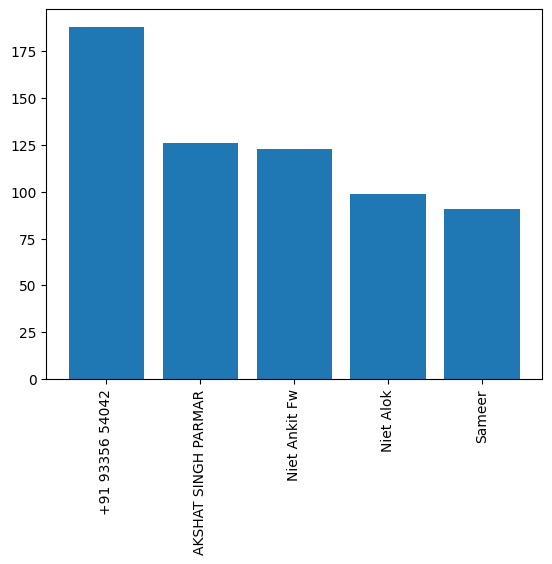

In [92]:
import matplotlib.pyplot as plt
name = x.index
count = x.values
plt.bar(name,count)
plt.xticks(rotation="vertical")
plt.show()

In [93]:
round((df["user"].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={"index":"name","user":"percent"})

name  percent
0       +91 93356 54042    10.30
1   AKSHAT SINGH PARMAR     6.90
2         Niet Ankit Fw     6.74
3             Niet Alok     5.42
4                Sameer     4.99
..                  ...      ...
64      +91 87916 71153     0.11
65     +91 6299 063 205     0.05
66     +91 6392 007 750     0.05
67               Nayant     0.05
68      +91 91614 38373     0.05

[69 rows x 2 columns]

In [94]:
temp = df[df["message"] != "<Media omitted>\n"]

In [95]:
# for removing stop words
f = open('stop_hinglish.txt',"r")
stop_words = f.read()

In [96]:
words=[]
for msg in temp["message"]:
    for word in msg.lower().split():
        if word not in stop_words:
            words.append(word)
    

In [97]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))


0    1
0           happy  270
1        birthday  237
2         message  100
3         deleted   98
4               üòÇ   26
5            bhej   23
6            unit   23
7   @919335654042   21
8            pass   20
9           paper   19
10          group   18
11  @918948948778   18
12  @917651855654   17
13  @917505816362   16
14          class   16
15           link   16
16       students   16
17  @919120550246   16
18            gya   15
19           dena   15

In [98]:
import emoji

In [99]:
emojis=[]
for msg in df["message"]:
    emojis.extend(emoji.distinct_emoji_list(msg))
print(emojis)

['üòÇ', 'ü§¢', 'üòÇ', 'üòÇ', 'ü§£', 'ü§®', 'üôÉ', 'üéâ', 'üéÇ', 'ü§ü', 'ü§ù', 'üôå', 'ü•Ç', 'üçî', '‚úåÔ∏è', 'ü•≥', 'üòÅ', 'ü•≥', 'üéâ', '‚úåÔ∏è', 'ü•Ç', 'ü§ó', 'ü§ù', 'üéÇ', 'üôã\u200d‚ôÇÔ∏è', 'ü§©', 'üí´', 'ü•≥', 'ü§ù', 'ü•≥', 'üéà', 'ü•Ç', 'üòä', 'ü§ù', 'ü•≥', 'üéÇ', 'üí´', 'ü•≥', 'üéâ', '‚ú®', 'ü§ó', 'ü•Ç', 'üòç', 'ü§ü', 'üòä', 'üòÅ', 'üéÇ', 'üéÇ', 'ü•≥', 'ü§ù', 'üôå', 'üéÇ', '‚ù§Ô∏è', 'ü•≥', 'ü•≥', 'ü•≥', 'üéÅ', 'ü•≤', 'üòÜ', 'ü•≤', 'üôÇ', 'ü§î', 'ü§£', 'üòé', 'üëÄ', 'üòÇ', 'üòÇ', 'üòÇ', 'üòÇ', 'üòÇ', 'üëà', 'üëâ', 'üéÇ', 'ü•≥', 'ü•Ç', 'üéÇ', '‚ù£Ô∏è', 'üëÄ', 'ü´Ç', '‚ú®', 'ü•≥', 'üéâ', '‚ò∫Ô∏è', 'üòú', 'üôÇ', 'ü•≤', 'üòÇ', 'üòÇ', 'üò∂\u200düå´', 'üòÇ', 'üòå', 'üòÇ', 'üòå', 'üòÇ', 'üòÇ', 'üòÇ', 'üòÇ', '‚ò†Ô∏è', 'üñ§', 'üí´', 'ü•≥', 'üéâ', 'ü´∂üèæ', 'üôÇ', 'üï∫', 'üéÇ', 'üòÇ', 'üòÅ', 'üòÇ', 'üòÖ', 'ü´°', 'üòÇ', 'üòÇ', 'üíØ', 'üòÅ', 'üòÇ', 'üòÇ', 'üåù', 'ü•≤', 'üòÇ', 'ü

In [100]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

0   1
0     üéÇ  66
1     üòÇ  64
2     ü•≥  62
3     üéâ  51
4    ‚ù§Ô∏è  26
..   ..  ..
113   üçë   1
114   ü•∫   1
115   üò≥   1
116   üéì   1
117   üìç   1

[118 rows x 2 columns]

In [101]:
df["month_num"] = df["date"].dt.month
df

date                 user  \
2    2022-10-25 11:54:00         Sumit Pathak   
3    2022-10-25 11:55:00         Sumit Pathak   
4    2022-10-25 14:19:00      +91 93356 54042   
5    2022-10-25 14:20:00      +91 72680 42840   
6    2022-10-25 14:20:00           Niet Tanay   
...                  ...                  ...   
1835 2023-07-05 19:42:00  AKSHAT SINGH PARMAR   
1836 2023-07-05 19:55:00           Niet Tanay   
1837 2023-07-05 19:57:00                 Ayan   
1838 2023-07-05 19:57:00  AKSHAT SINGH PARMAR   
1839 2023-07-05 19:57:00           Niet Tanay   

                                                message   months  day  year  \
2        Yaar discrete me bhi assignment mila hai kya\n  October   25  2022   
3     Mila hai toh please solution bhi bhej do please\n  October   25  2022   
4                  Kya yrr Diwali to thik sae mana lo\n  October   25  2022   
5                                                   üòÇ\n  October   25  2022   
6                 Aaj ke din padhai nahi ki jaati hai\n  October   25  2022   
...                                                 ...      ...  ...   ...   
1835         Renuka maam ka hai\nHindi mai bharna sbb\n     July    5  2023   
1836  Oh damn, it would be fun reading all this data.\n     July    5  2023   
1837  Sabse bade regret ka answer shayad sab ka same...     July    5  2023   
1838                   Bss bhai mai bhi yahi likha hu\n     July    5  2023   
1839                üòÇ education category me aayega wo\n     July    5  2023   

      hour  minute  month_num  
2       11      54         10  
3       11      55         10  
4       14      19         10  
5       14      20         10  
6       14      20         10  
...    ...     ...        ...  
1835    19      42          7  
1836    19      55          7  
1837    19      57          7  
1838    19      57          7  
1839    19      57          7  

[1825 rows x 9 columns]

In [103]:
timeline = df.groupby(["year","month_num","months"]).count()["message"].reset_index()
timeline

year  month_num    months  message
0  2022         10   October       14
1  2022         11  November      359
2  2022         12  December      313
3  2023          1   January      130
4  2023          2  February      196
5  2023          3     March      220
6  2023          4     April      264
7  2023          5       May      224
8  2023          6      June       97
9  2023          7      July        8

In [106]:
time =[]
for i in range(timeline.shape[0]):
    time.append(timeline["months"][i]+"-"+str(timeline["year"][i]))


In [108]:
timeline["time"] = time

In [109]:
timeline

year  month_num    months  message           time
0  2022         10   October       14   October-2022
1  2022         11  November      359  November-2022
2  2022         12  December      313  December-2022
3  2023          1   January      130   January-2023
4  2023          2  February      196  February-2023
5  2023          3     March      220     March-2023
6  2023          4     April      264     April-2023
7  2023          5       May      224       May-2023
8  2023          6      June       97      June-2023
9  2023          7      July        8      July-2023

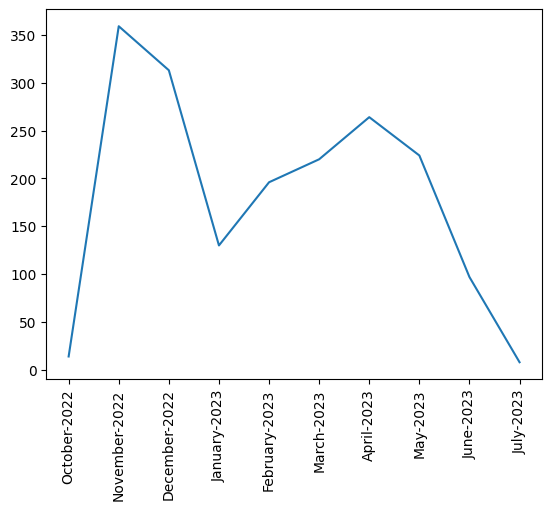

In [111]:
plt.plot(timeline["time"],timeline["message"])
plt.xticks(rotation = "vertical")
plt.show()


In [115]:
df["only_date"] = df["date"].dt.date

In [116]:
daily_timeline = df.groupby("only_date").count()["message"].reset_index()


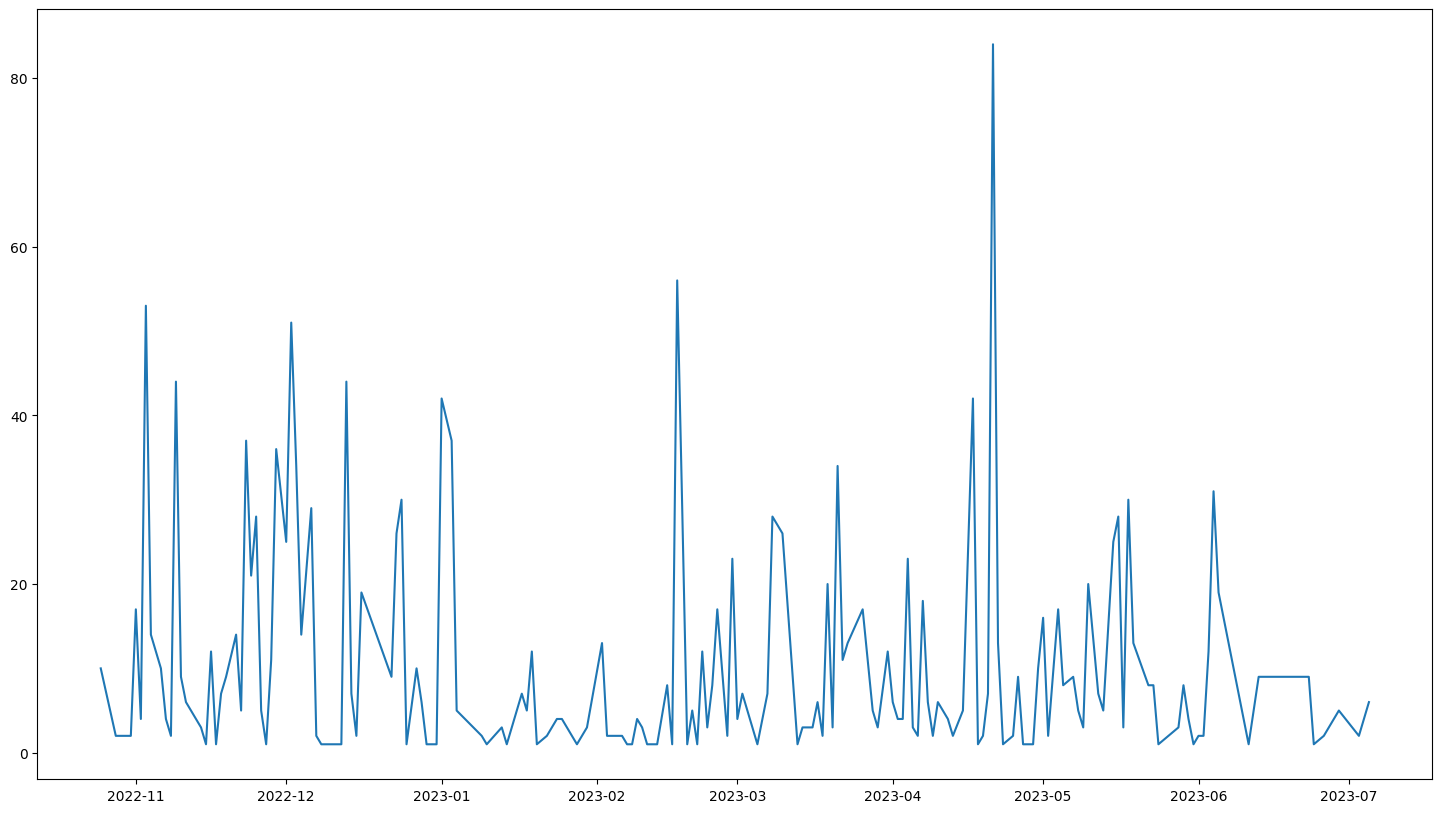

In [118]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline["only_date"],daily_timeline["message"])

In [119]:
df.head()

date             user  \
2 2022-10-25 11:54:00     Sumit Pathak   
3 2022-10-25 11:55:00     Sumit Pathak   
4 2022-10-25 14:19:00  +91 93356 54042   
5 2022-10-25 14:20:00  +91 72680 42840   
6 2022-10-25 14:20:00       Niet Tanay   

                                             message   months  day  year  \
2     Yaar discrete me bhi assignment mila hai kya\n  October   25  2022   
3  Mila hai toh please solution bhi bhej do please\n  October   25  2022   
4               Kya yrr Diwali to thik sae mana lo\n  October   25  2022   
5                                                üòÇ\n  October   25  2022   
6              Aaj ke din padhai nahi ki jaati hai\n  October   25  2022   

   hour  minute  month_num   only_date  
2    11      54         10  2022-10-25  
3    11      55         10  2022-10-25  
4    14      19         10  2022-10-25  
5    14      20         10  2022-10-25  
6    14      20         10  2022-10-25

In [120]:
df["day_name"] = df["date"].dt.day_name()


In [121]:
df["day_name"].value_counts()

Friday       412
Tuesday      362
Wednesday    249
Thursday     244
Monday       202
Saturday     186
Sunday       170
Name: day_name, dtype: int64

In [122]:
df.head()

date             user  \
2 2022-10-25 11:54:00     Sumit Pathak   
3 2022-10-25 11:55:00     Sumit Pathak   
4 2022-10-25 14:19:00  +91 93356 54042   
5 2022-10-25 14:20:00  +91 72680 42840   
6 2022-10-25 14:20:00       Niet Tanay   

                                             message   months  day  year  \
2     Yaar discrete me bhi assignment mila hai kya\n  October   25  2022   
3  Mila hai toh please solution bhi bhej do please\n  October   25  2022   
4               Kya yrr Diwali to thik sae mana lo\n  October   25  2022   
5                                                üòÇ\n  October   25  2022   
6              Aaj ke din padhai nahi ki jaati hai\n  October   25  2022   

   hour  minute  month_num   only_date day_name  
2    11      54         10  2022-10-25  Tuesday  
3    11      55         10  2022-10-25  Tuesday  
4    14      19         10  2022-10-25  Tuesday  
5    14      20         10  2022-10-25  Tuesday  
6    14      20         10  2022-10-25  Tuesday

In [124]:
period = []
for hour in df[["day_name","hour"]]["hour"]:
    if hour == 23:
        period.append(str(hour)+"-"+str("00"))
    elif hour == 0:
        period.append(str("00")+"-"+str(hour + 1))
    else:
        period.append(str(hour)+"-"+str(hour + 1))

In [126]:
df["period"] = period


df.sample()

In [127]:
df.sample()

date       user message months  day  year  hour  minute  \
1053 2023-03-08 14:04:00  Niet Alok     üíö\n  March    8  2023    14       4   

      month_num   only_date   day_name period  
1053          3  2023-03-08  Wednesday  14-15

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index="day_name",columns="peroid",values="message",aggfunc="count").fillna(0))
plt.yticks(rotation ="horizontal")